In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.utils import to_categorical
from scipy.stats import linregress

2022-10-11 15:26:54.110311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_list = pd.read_csv("Resources/cleandata/clean_listings.csv")
df_list.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0
1,953595,Seattle,WA,98119,47.639123,-122.365666,4,1.0,1.0,1.0,150,96.0
2,3308979,Seattle,WA,98119,47.629724,-122.369483,11,4.5,5.0,7.0,975,97.0
3,278830,Seattle,WA,98119,47.632918,-122.372471,6,2.0,3.0,3.0,450,92.0
4,5956968,Seattle,WA,98119,47.630525,-122.366174,2,1.0,1.0,1.0,120,95.0


In [3]:
df_cal = pd.read_csv("Resources/cleandata/clean_calendar.csv")
df_cal.head()

,listing_id,date,available,price
0,241032,1,t,85
1,241032,1,t,85
2,241032,1,t,85
3,241032,1,t,85
4,241032,1,t,85


In [4]:
df_cal_g = df_cal.groupby(['listing_id','date']).mean()
df_cal_g

price
listing_id date       
3335       1     120.0
           2     120.0
           3     120.0
           4     120.0
           5     120.0
...                ...
10340165   8      43.0
           9      43.0
           10     43.0
           11     43.0
           12     43.0

[33939 rows x 1 columns]

In [5]:
df_cal_g = df_cal_g.reset_index(level=['date'])
df_cal_g.head()

,date,price
listing_id,,
3335,1,120.0
3335,2,120.0
3335,3,120.0
3335,4,120.0
3335,5,120.0


In [6]:
df = df_list.merge(df_cal_g, how='inner', on='listing_id')
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,date,price_y
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [7]:
df.rename(columns={"price_y":'price','date':'month'}, inplace=True)
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,month,price
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [8]:
df.drop(columns=['state','listing_id','price_x'], inplace=True)

In [9]:
df.head()

,city,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,month,price
0,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,1,85.0
1,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,2,85.0
2,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,3,85.0
3,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,4,85.0
4,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,5,85.0


In [10]:
df.price.min()

20.0

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 0.0000e+00,
        8.0000e+00, 8.0000e+00, 1.2300e+02, 1.8200e+02, 2.3200e+02,
        1.1420e+03, 1.7220e+03, 6.9350e+03, 1.8073e+04]),
 array([ 20.        ,  25.71428571,  31.42857143,  37.14285714,
         42.85714286,  48.57142857,  54.28571429,  60.        ,
         65.71428571,  71.42857143,  77.14285714,  82.85714286,
         88.57142857,  94.28571429, 100.        ]),
 <BarContainer object of 14 artists>)

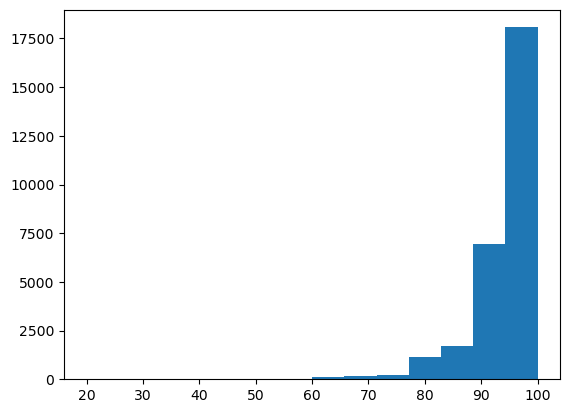

In [11]:
plt.hist(df['review_scores_rating'], bins=14)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+01, 0.0000e+00, 1.2000e+01, 1.0300e+02,
        1.8300e+02, 3.1400e+02, 3.2470e+03, 2.4566e+04]),
 array([1.30103   , 1.35095642, 1.40088285, 1.45080928, 1.50073571,
        1.55066214, 1.60058857, 1.650515  , 1.70044143, 1.75036786,
        1.80029428, 1.85022071, 1.90014714, 1.95007357, 2.        ]),
 <BarContainer object of 14 artists>)

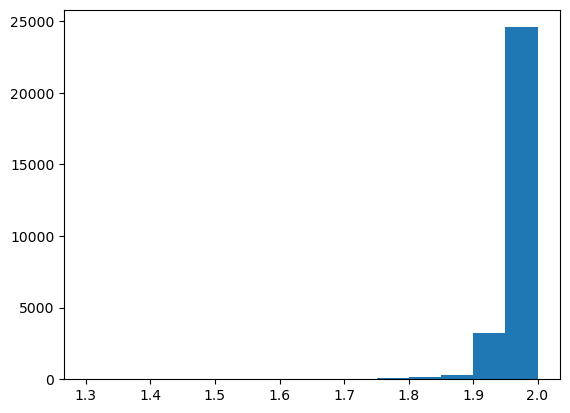

In [12]:
plt.hist(df['review_scores_rating'].apply(np.log10), bins=14)

In [13]:
# df['review_scores_rating'] = df['review_scores_rating'].apply(np.log10)

(array([21084.,  4754.,  2381.,   167.,    67.]),
 array([0. , 1.4, 2.8, 4.2, 5.6, 7. ]),
 <BarContainer object of 5 artists>)

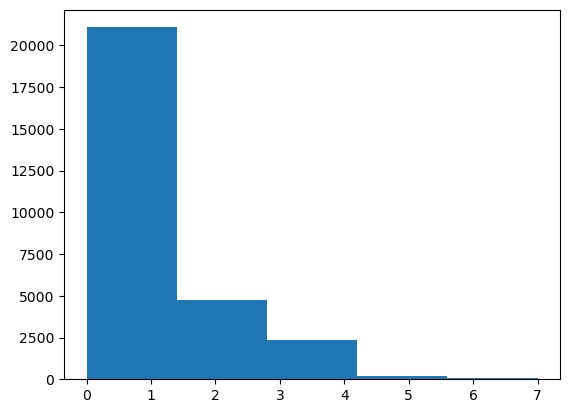

In [14]:
plt.hist(df['bedrooms'], bins=5)

(array([ 2680., 18404.,  4754.,  2381.,   234.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131]),
 <BarContainer object of 5 artists>)

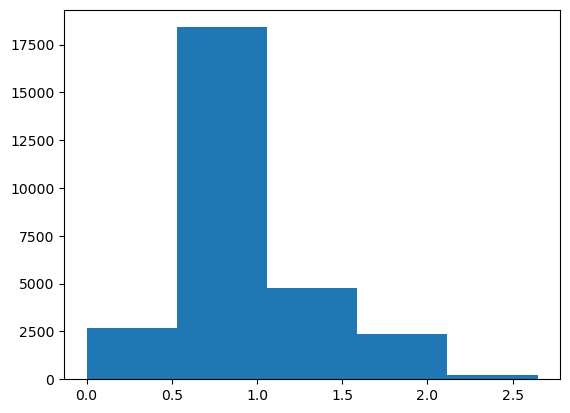

In [15]:
plt.hist(df['bedrooms'].apply(np.sqrt), bins=5)

In [16]:
df['bedrooms']=df['bedrooms'].apply(np.sqrt)

(array([2.3801e+04, 4.0490e+03, 5.7400e+02, 2.4000e+01, 5.0000e+00]),
 array([0. , 1.6, 3.2, 4.8, 6.4, 8. ]),
 <BarContainer object of 5 artists>)

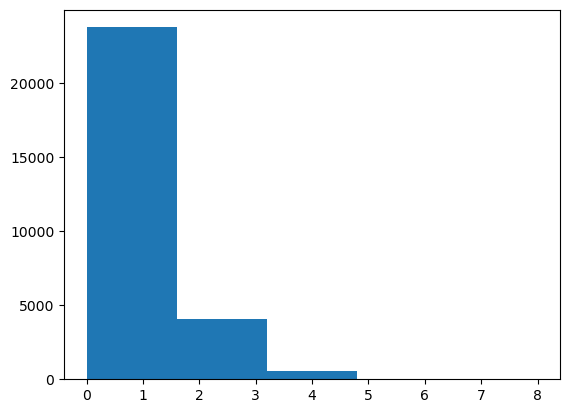

In [17]:
plt.hist(df['bathrooms'], bins=5)

(array([   38.,   226., 23537.,  4594.,    58.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

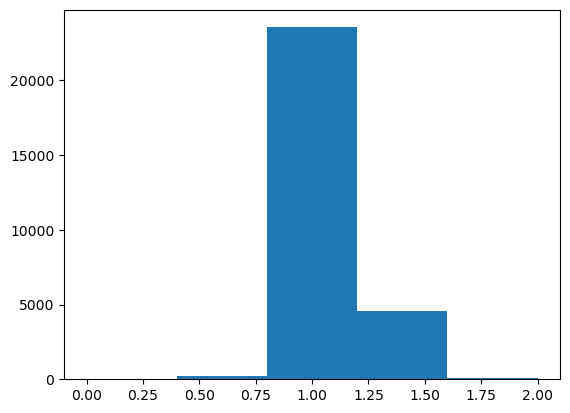

In [18]:
plt.hist(df['bathrooms'].apply(lambda x: pow(x,1/3)), bins=5)

In [19]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: pow(x,1/3))

(array([16953.,  9794.,  1253.,   373.,    80.]),
 array([ 1.,  4.,  7., 10., 13., 16.]),
 <BarContainer object of 5 artists>)

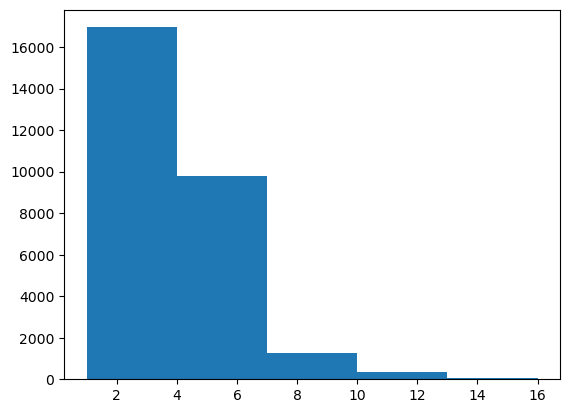

In [20]:
plt.hist(df['accommodates'], bins=5)

(array([ 1786., 15167.,  7163.,  3884.,   453.]),
 array([0.        , 0.240824  , 0.48164799, 0.72247199, 0.96329599,
        1.20411998]),
 <BarContainer object of 5 artists>)

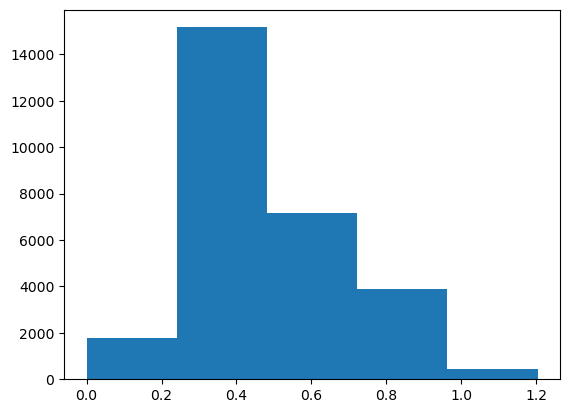

In [21]:
plt.hist(df['accommodates'].apply(np.log10), bins=5)

In [22]:
df['accommodates']=df['accommodates'].apply(np.log10)

(array([2.753e+04, 6.620e+02, 1.990e+02, 2.600e+01, 2.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.200e+01]),
 array([  1. ,  23.4,  45.8,  68.2,  90.6, 113. , 135.4, 157.8, 180.2,
        202.6, 225. ]),
 <BarContainer object of 10 artists>)

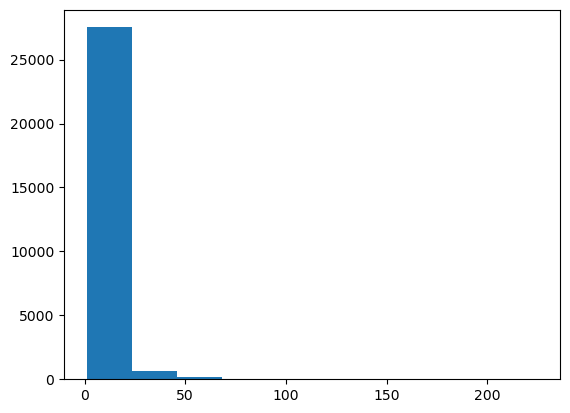

In [23]:
plt.hist(df.beds.apply(lambda x: pow(x,2)), bins =10)

In [24]:
# df.beds = df.beds.apply(lambda x: pow(x,2))

In [25]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[['city','zipcode','month']]))
encode_df.columns = enc.get_feature_names(['city','zipcode','month'])

/Users/johnwhendricks/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
df = df.merge(encode_df, left_index=True, right_index=True)
df.drop(columns=['city','zipcode','month'], inplace=True)

In [27]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,"city_Ballard, Seattle",city_Phinney Ridge Seattle,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.636289,-122.371025,0.60206,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X = df.drop(columns=['price'])
y = df['price']

In [29]:
print(X.shape)
print(y.shape)

(28453, 53)
(28453,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
X_train_scaled

array([[-0.77306607,  0.75439575, -0.69220407, ..., -0.28910724,
        -0.29477875, -0.30019151],
       [ 0.61125075, -0.88136646, -0.69220407, ..., -0.28910724,
        -0.29477875, -0.30019151],
       [ 0.824227  , -0.15509485, -0.69220407, ..., -0.28910724,
        -0.29477875, -0.30019151],
       ...,
       [-0.28611005,  0.26871801,  1.34834354, ..., -0.28910724,
        -0.29477875, -0.30019151],
       [-0.25840041, -0.39924755,  1.63466093, ..., -0.28910724,
        -0.29477875, -0.30019151],
       [-0.43080887,  0.79599034, -0.69220407, ..., -0.28910724,
        -0.29477875, -0.30019151]])

In [33]:
y_train

7880     111.666667
27863    105.800000
2234      90.000000
17729     95.000000
5678     107.125000
            ...    
20745     90.200000
1328      90.000000
19911     99.000000
9647     546.290323
7044      90.000000
Name: price, Length: 21339, dtype: float64

In [34]:
input_dim = X.shape[1]

model = Sequential([
    Dense(200, input_dim = input_dim, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

model.summary()

2022-10-11 15:26:59.737943: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               10800     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 37,251
Trainable params: 37,251
Non-trainable params: 0
_________________________________________________________________


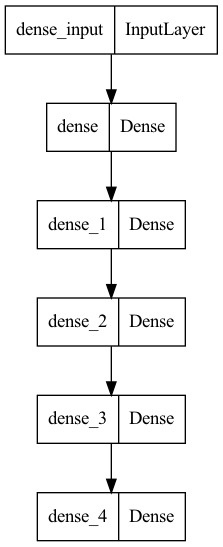

In [35]:
tf.keras.utils.plot_model(model)

In [36]:
model.compile(optimizer='adam',loss='mse')

In [37]:
history = model.fit(X_train_scaled, y_train, epochs=500, 
                    validation_data=(X_test_scaled, y_test), 
                    callbacks=[
                        tf.keras.callbacks.ModelCheckpoint('model.hdf5', 
                            save_weights_only=True, save_best_only=True)
                    ])

Epoch 1/500
667/667 [==============================] - 2s 2ms/step - loss: 6210.4326 - val_loss: 3679.7036
Epoch 2/500
667/667 [==============================] - 1s 2ms/step - loss: 3985.9971 - val_loss: 3496.3428
Epoch 3/500
667/667 [==============================] - 1s 1ms/step - loss: 3788.1958 - val_loss: 3444.4033
Epoch 4/500
667/667 [==============================] - 1s 1ms/step - loss: 3682.0620 - val_loss: 3474.6401
Epoch 5/500
667/667 [==============================] - 1s 1ms/step - loss: 3603.7905 - val_loss: 3371.1316
Epoch 6/500
667/667 [==============================] - 1s 1ms/step - loss: 3525.3623 - val_loss: 3268.9326
Epoch 7/500
667/667 [==============================] - 1s 1ms/step - loss: 3425.3699 - val_loss: 3226.6550
Epoch 8/500
667/667 [==============================] - 1s 1ms/step - loss: 3336.2017 - val_loss: 3282.2451
Epoch 9/500
667/667 [==============================] - 1s 2ms/step - loss: 3218.7490 - val_loss: 3242.4875
Epoch 10/500
667/667 [===============

667/667 [==============================] - 1s 1ms/step - loss: 793.4456 - val_loss: 1276.4261
Epoch 78/500
667/667 [==============================] - 1s 1ms/step - loss: 694.8092 - val_loss: 1106.6982
Epoch 79/500
667/667 [==============================] - 1s 1ms/step - loss: 657.1694 - val_loss: 1109.5449
Epoch 80/500
667/667 [==============================] - 1s 1ms/step - loss: 690.7537 - val_loss: 1337.7142
Epoch 81/500
667/667 [==============================] - 1s 1ms/step - loss: 677.7545 - val_loss: 1154.8436
Epoch 82/500
667/667 [==============================] - 1s 1ms/step - loss: 653.5828 - val_loss: 1190.1523
Epoch 83/500
667/667 [==============================] - 1s 1ms/step - loss: 708.5955 - val_loss: 1090.5883
Epoch 84/500
667/667 [==============================] - 1s 1ms/step - loss: 607.5673 - val_loss: 1088.3805
Epoch 85/500
667/667 [==============================] - 1s 1ms/step - loss: 670.5366 - val_loss: 1129.8629
Epoch 86/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 373.0588 - val_loss: 877.5521
Epoch 154/500
667/667 [==============================] - 1s 2ms/step - loss: 356.9794 - val_loss: 933.8748
Epoch 155/500
667/667 [==============================] - 1s 2ms/step - loss: 380.5421 - val_loss: 855.1921
Epoch 156/500
667/667 [==============================] - 1s 2ms/step - loss: 352.5851 - val_loss: 859.8997
Epoch 157/500
667/667 [==============================] - 1s 2ms/step - loss: 331.2736 - val_loss: 811.2194
Epoch 158/500
667/667 [==============================] - 1s 2ms/step - loss: 344.5648 - val_loss: 870.4697
Epoch 159/500
667/667 [==============================] - 1s 1ms/step - loss: 345.5553 - val_loss: 810.1786
Epoch 160/500
667/667 [==============================] - 1s 2ms/step - loss: 334.0405 - val_loss: 864.6924
Epoch 161/500
667/667 [==============================] - 1s 1ms/step - loss: 410.8203 - val_loss: 918.2555
Epoch 162/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 259.0485 - val_loss: 820.7997
Epoch 230/500
667/667 [==============================] - 1s 2ms/step - loss: 268.2978 - val_loss: 796.8204
Epoch 231/500
667/667 [==============================] - 1s 2ms/step - loss: 235.4195 - val_loss: 720.4577
Epoch 232/500
667/667 [==============================] - 1s 2ms/step - loss: 232.2015 - val_loss: 806.3338
Epoch 233/500
667/667 [==============================] - 1s 2ms/step - loss: 248.7792 - val_loss: 761.7895
Epoch 234/500
667/667 [==============================] - 1s 2ms/step - loss: 226.8946 - val_loss: 816.8121
Epoch 235/500
667/667 [==============================] - 1s 2ms/step - loss: 255.6044 - val_loss: 697.5828
Epoch 236/500
667/667 [==============================] - 1s 2ms/step - loss: 211.5736 - val_loss: 734.2327
Epoch 237/500
667/667 [==============================] - 1s 2ms/step - loss: 228.3021 - val_loss: 752.7788
Epoch 238/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 171.3699 - val_loss: 684.6586
Epoch 306/500
667/667 [==============================] - 1s 1ms/step - loss: 187.9224 - val_loss: 789.8569
Epoch 307/500
667/667 [==============================] - 1s 1ms/step - loss: 197.0121 - val_loss: 654.7001
Epoch 308/500
667/667 [==============================] - 1s 2ms/step - loss: 172.9356 - val_loss: 696.1437
Epoch 309/500
667/667 [==============================] - 1s 1ms/step - loss: 172.5854 - val_loss: 650.0988
Epoch 310/500
667/667 [==============================] - 1s 1ms/step - loss: 174.7296 - val_loss: 704.8585
Epoch 311/500
667/667 [==============================] - 1s 1ms/step - loss: 219.4255 - val_loss: 699.6631
Epoch 312/500
667/667 [==============================] - 1s 1ms/step - loss: 178.2422 - val_loss: 643.4526
Epoch 313/500
667/667 [==============================] - 1s 2ms/step - loss: 174.4943 - val_loss: 640.3279
Epoch 314/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 144.8931 - val_loss: 604.0556
Epoch 382/500
667/667 [==============================] - 1s 1ms/step - loss: 143.6568 - val_loss: 637.9293
Epoch 383/500
667/667 [==============================] - 1s 1ms/step - loss: 155.1049 - val_loss: 638.8405
Epoch 384/500
667/667 [==============================] - 1s 1ms/step - loss: 141.3435 - val_loss: 653.0770
Epoch 385/500
667/667 [==============================] - 1s 1ms/step - loss: 141.9265 - val_loss: 622.9375
Epoch 386/500
667/667 [==============================] - 1s 1ms/step - loss: 139.7918 - val_loss: 662.3929
Epoch 387/500
667/667 [==============================] - 1s 1ms/step - loss: 145.8695 - val_loss: 661.6641
Epoch 388/500
667/667 [==============================] - 1s 1ms/step - loss: 138.8882 - val_loss: 631.2132
Epoch 389/500
667/667 [==============================] - 1s 2ms/step - loss: 136.6256 - val_loss: 649.2117
Epoch 390/500
667/667 [============================

667/667 [==============================] - 1s 1ms/step - loss: 126.2774 - val_loss: 638.5678
Epoch 458/500
667/667 [==============================] - 1s 1ms/step - loss: 123.2734 - val_loss: 621.6917
Epoch 459/500
667/667 [==============================] - 1s 1ms/step - loss: 122.6924 - val_loss: 650.9155
Epoch 460/500
667/667 [==============================] - 1s 1ms/step - loss: 125.0025 - val_loss: 637.1043
Epoch 461/500
667/667 [==============================] - 1s 1ms/step - loss: 114.4086 - val_loss: 600.7832
Epoch 462/500
667/667 [==============================] - 1s 1ms/step - loss: 114.1283 - val_loss: 605.1539
Epoch 463/500
667/667 [==============================] - 1s 1ms/step - loss: 141.1640 - val_loss: 638.8844
Epoch 464/500
667/667 [==============================] - 1s 1ms/step - loss: 115.3133 - val_loss: 604.7491
Epoch 465/500
667/667 [==============================] - 1s 1ms/step - loss: 110.9464 - val_loss: 611.7694
Epoch 466/500
667/667 [============================

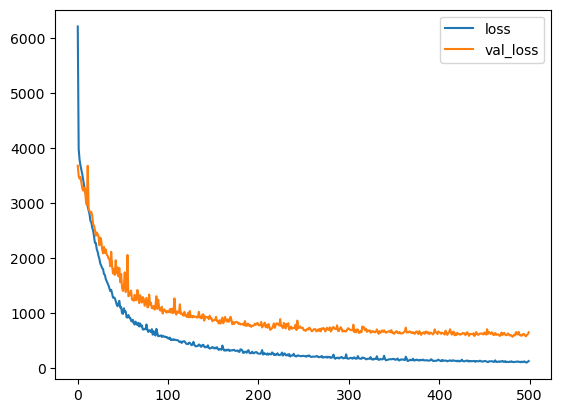

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

In [54]:
model.load_weights('model.hdf5')
y_pred = model.predict(X_test_scaled)

223/223 [==============================] - 0s 866us/step


Text(0.5, 0, 'predicted price')

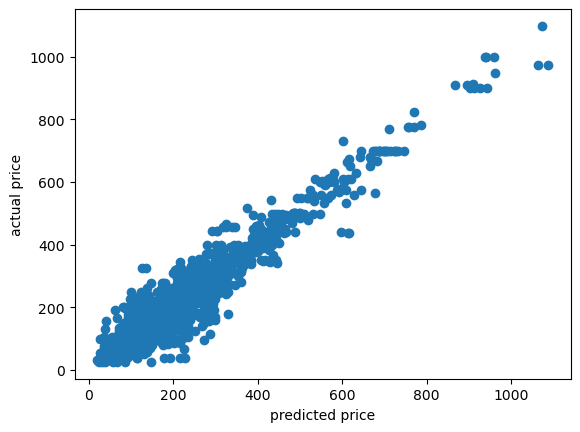

In [55]:
plt.scatter(y_pred, y_test)
plt.ylabel('actual price')
plt.xlabel('predicted price')

In [56]:
y_pred.tolist()

[[302.49005126953125],
 [49.17804718017578],
 [105.35031127929688],
 [97.09630584716797],
 [235.97103881835938],
 [83.81246185302734],
 [71.74935913085938],
 [57.75030517578125],
 [76.84862518310547],
 [46.543338775634766],
 [173.80589294433594],
 [153.31381225585938],
 [60.410736083984375],
 [85.9733657836914],
 [72.20563507080078],
 [117.16209411621094],
 [114.76038360595703],
 [73.31902313232422],
 [119.3797836303711],
 [81.41819763183594],
 [81.45587158203125],
 [241.58677673339844],
 [175.4903564453125],
 [152.1706085205078],
 [107.6199722290039],
 [124.58039093017578],
 [220.1357421875],
 [291.3120422363281],
 [214.83526611328125],
 [121.16220092773438],
 [47.83115005493164],
 [94.65399169921875],
 [103.30933380126953],
 [110.07935333251953],
 [84.34529876708984],
 [158.74020385742188],
 [49.09181594848633],
 [109.85895538330078],
 [140.9492645263672],
 [80.44145965576172],
 [77.3413314819336],
 [60.03754425048828],
 [77.4822769165039],
 [108.65047454833984],
 [56.667327880859375

In [57]:
y_test.values.tolist()

[300.0,
 60.0,
 100.0,
 115.0,
 245.0,
 85.0,
 90.0,
 60.0,
 85.0,
 32.25,
 175.0,
 160.0,
 75.0,
 95.0,
 51.0,
 175.0,
 120.0,
 115.0,
 133.8709677419355,
 85.0,
 108.46666666666667,
 250.0,
 160.80645161290323,
 138.27586206896552,
 81.66666666666667,
 120.10526315789474,
 228.0,
 295.0,
 39.0,
 127.38709677419355,
 75.0,
 89.86666666666666,
 100.0,
 107.0,
 87.58064516129032,
 192.38709677419354,
 54.0,
 122.0,
 150.0,
 75.45454545454545,
 85.0,
 55.0,
 75.64516129032258,
 90.0,
 55.0,
 975.0,
 124.76,
 62.74193548387097,
 109.0,
 65.0,
 350.0,
 350.0,
 51.666666666666664,
 65.0,
 165.0,
 79.0,
 99.0,
 460.46666666666664,
 250.0,
 275.0,
 500.0,
 89.0,
 74.16129032258064,
 160.0,
 100.0,
 125.0,
 300.0,
 125.0,
 50.0,
 132.90322580645162,
 332.741935483871,
 40.16129032258065,
 150.0,
 81.90322580645162,
 250.0,
 201.75862068965517,
 105.0,
 85.0,
 60.0,
 250.0,
 63.83870967741935,
 200.0,
 60.0,
 65.0,
 156.8695652173913,
 75.45161290322581,
 80.0,
 199.29032258064515,
 80.0,
 76.8

In [58]:
results_df = pd.DataFrame({'predicted price':y_pred[:,0]})
results_df.head()

,predicted price
0,302.490051
1,49.178047
2,105.350311
3,97.096306
4,235.971039


In [59]:
results_df['actual price'] = y_test.values

In [60]:
results_df.head(20)

,predicted price,actual price
0,302.490051,300.000000
1,49.178047,60.000000
2,105.350311,100.000000
3,97.096306,115.000000
4,235.971039,245.000000
5,83.812462,85.000000
6,71.749359,90.000000
7,57.750305,60.000000
8,76.848625,85.000000
9,46.543339,32.250000


In [61]:
results_df['diff'] = abs(results_df['predicted price'] - results_df['actual price'])
results_df

,predicted price,actual price,diff
0,302.490051,300.000000,2.490051
1,49.178047,60.000000,10.821953
2,105.350311,100.000000,5.350311
3,97.096306,115.000000,17.903694
4,235.971039,245.000000,9.028961
...,...,...,...
7109,79.007561,78.000000,1.007561
7110,40.219791,45.000000,4.780209
7111,70.772308,96.333333,25.561025
7112,162.765228,169.645161,6.879933


In [62]:
rmse = np.sqrt(history.history['val_loss'][-1])
diffs = results_df['diff'].sum() / results_df.shape[0]
results_df['lower'] = round(results_df['predicted price'] - 2*rmse)
results_df['upper'] = round(results_df['predicted price'] + 2*rmse)

results_df.loc[results_df['lower'] < 20, 'lower'] = 20

results_df['accurate'] = (results_df['lower'] <= results_df['actual price']) & (results_df['actual price'] <= results_df['upper']) 
results_df.tail()

,predicted price,actual price,diff,lower,upper,accurate
7109,79.007561,78.000000,1.007561,28.0,130.0,True
7110,40.219791,45.000000,4.780209,20.0,91.0,True
7111,70.772308,96.333333,25.561025,20.0,122.0,True
7112,162.765228,169.645161,6.879933,112.0,214.0,True
7113,24.654741,27.875000,3.220259,20.0,76.0,True


In [63]:
results_df.head(20)

,predicted price,actual price,diff,lower,upper,accurate
0,302.490051,300.000000,2.490051,251.0,354.0,True
1,49.178047,60.000000,10.821953,20.0,100.0,True
2,105.350311,100.000000,5.350311,54.0,156.0,True
3,97.096306,115.000000,17.903694,46.0,148.0,True
4,235.971039,245.000000,9.028961,185.0,287.0,True
5,83.812462,85.000000,1.187538,33.0,135.0,True
6,71.749359,90.000000,18.250641,21.0,123.0,True
7,57.750305,60.000000,2.249695,20.0,109.0,True
8,76.848625,85.000000,8.151375,26.0,128.0,True
9,46.543339,32.250000,14.293339,20.0,98.0,True


In [64]:
results_df[results_df['accurate'] == False]

,predicted price,actual price,diff,lower,upper,accurate
15,117.162094,175.000000,57.837906,66.0,168.0,False
28,214.835266,39.000000,175.835266,164.0,266.0,False
45,1087.433716,975.000000,112.433716,1036.0,1138.0,False
70,269.435272,332.741935,63.306663,218.0,320.0,False
92,107.199638,228.473684,121.274046,56.0,158.0,False
...,...,...,...,...,...,...
7016,287.858459,115.000000,172.858459,237.0,339.0,False
7018,180.734848,275.000000,94.265152,130.0,232.0,False
7043,423.211395,347.233333,75.978062,372.0,474.0,False
7063,296.063934,192.096774,103.967160,245.0,347.0,False


In [65]:
results_df['accurate'].value_counts()

True     6792
False     322
Name: accurate, dtype: int64

In [66]:
results_df['accurate'].value_counts()[1] / results_df['accurate'].value_counts().sum()

0.9547371380376722

In [67]:
_, _, r_value, _, _ = linregress(results_df['predicted price'].values,results_df['actual price'].values)

In [68]:
print('r value:',r_value)

r value: 0.9722484281597511
